In [1]:
# Bruno Vieira Ribeiro

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%config Completer.use_jedi = False        # For autocomplete to work!

In [3]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

In [4]:
df_ludo = pd.read_csv('./cleaned/ludopedia-clean-full.csv')

In [5]:
df_ludo.head()

position              title  year  notaRank  media  notas  age  \
0         1         Gloomhaven  2017      8.99   9.19    512   12   
1         2      Terra Mystica  2012      8.99   9.04   2036   14   
2         3       Gaia Project  2017      8.96   9.07    898   14   
3         4  Terraforming Mars  2016      8.95   9.00   2005   12   
4         5  Brass: Birmingham  2018      8.93   9.11    547   14   

  numOfPlayers  timeOfPlay       dominio  ...  \
0        1 a 4         120  Jogos Expert  ...   
1        2 a 5         100  Jogos Expert  ...   
2        1 a 4         150  Jogos Expert  ...   
3        1 a 5         120  Jogos Expert  ...   
4        2 a 4         120  Jogos Expert  ...   

                                           artist  \
0  Alexandr Elichev,Josh T. McDowell,Alvaro Nebot   
1                                 Dennis Lohausen   
2                                 Dennis Lohausen   
3                                 Isaac Fryxelius   
4     Lina Cossette,David Forest,Damien Mammoliti   

                                 designer  \
0                          Isaac Childres   
1         Jens Drögemüller,Helge Ostertag   
2         Jens Drögemüller,Helge Ostertag   
3                         Jacob Fryxelius   
4  Gavan Brown,Matt Tolman,Martin Wallace   

                                              imagem minPlayers  maxPlayers  \
0  https://storage.googleapis.com/ludopedia-capas...          1           4   
1  https://storage.googleapis.com/ludopedia-capas...          2           5   
2  https://storage.googleapis.com/ludopedia-capas...          1           4   
3  https://storage.googleapis.com/ludopedia-capas...          1           5   
4  https://storage.googleapis.com/ludopedia-capas...          2           4   

                                      shared_artists  \
0                                           729,1005   
1  2,23,28,68,71,87,100,106,165,211,215,235,240,2...   
2  1,23,28,68,71,87,100,106,165,211,215,235,240,2...   
3                                                NaN   
4                5,133,223,377,481,871,882,1352,1810   

                                    shared_designers  \
0                                      729,1005,1282   
1                                             2,1525   
2                                             1,1525   
3                                                NaN   
4  5,94,163,347,382,401,432,647,726,820,867,882,9...   

                    plusOneArtist games_with_sa  games_with_posa  
0                        729,1005             2                2  
1                             NaN            35                0  
2                             NaN            35                0  
3                             NaN             0                0  
4  5,133,223,377,481,871,882,1810             9                8  

[5 rows x 21 columns]

In [6]:
df_ludo.fillna({'shared_artists':'', 'shared_designers':'', 'plusOneArtist':''}, inplace=True)

In [7]:
df_ludo.columns

Index(['position', 'title', 'year', 'notaRank', 'media', 'notas', 'age',
       'numOfPlayers', 'timeOfPlay', 'dominio', 'mecanicas', 'artist',
       'designer', 'imagem', 'minPlayers', 'maxPlayers', 'shared_artists',
       'shared_designers', 'plusOneArtist', 'games_with_sa',
       'games_with_posa'],
      dtype='object')

We can drop the `numOfPlayers` column as all its information is already contained within `minPlayers` and `maxPlayers`.

In [8]:
df_ludo = df_ludo.drop('numOfPlayers', axis = 1)

In [9]:
df_ludo.head()

position              title  year  notaRank  media  notas  age  timeOfPlay  \
0         1         Gloomhaven  2017      8.99   9.19    512   12         120   
1         2      Terra Mystica  2012      8.99   9.04   2036   14         100   
2         3       Gaia Project  2017      8.96   9.07    898   14         150   
3         4  Terraforming Mars  2016      8.95   9.00   2005   12         120   
4         5  Brass: Birmingham  2018      8.93   9.11    547   14         120   

        dominio                                          mecanicas  \
0  Jogos Expert  Ação Simultânea,Gestão de Mão,Cooperativo,Joga...   
1  Jogos Expert  Jogadores com Diferentes Habilidades,Construçã...   
2  Jogos Expert  Construção de Rotas,Jogadores com Diferentes H...   
3  Jogos Expert  Gestão de Mão,Colocação de Peças,Jogadores com...   
4  Jogos Expert                  Construção de Rotas,Gestão de Mão   

                                           artist  \
0  Alexandr Elichev,Josh T. McDowell,Alvaro Nebot   
1                                 Dennis Lohausen   
2                                 Dennis Lohausen   
3                                 Isaac Fryxelius   
4     Lina Cossette,David Forest,Damien Mammoliti   

                                 designer  \
0                          Isaac Childres   
1         Jens Drögemüller,Helge Ostertag   
2         Jens Drögemüller,Helge Ostertag   
3                         Jacob Fryxelius   
4  Gavan Brown,Matt Tolman,Martin Wallace   

                                              imagem  minPlayers  maxPlayers  \
0  https://storage.googleapis.com/ludopedia-capas...           1           4   
1  https://storage.googleapis.com/ludopedia-capas...           2           5   
2  https://storage.googleapis.com/ludopedia-capas...           1           4   
3  https://storage.googleapis.com/ludopedia-capas...           1           5   
4  https://storage.googleapis.com/ludopedia-capas...           2           4   

                                      shared_artists  \
0                                           729,1005   
1  2,23,28,68,71,87,100,106,165,211,215,235,240,2...   
2  1,23,28,68,71,87,100,106,165,211,215,235,240,2...   
3                                                      
4                5,133,223,377,481,871,882,1352,1810   

                                    shared_designers  \
0                                      729,1005,1282   
1                                             2,1525   
2                                             1,1525   
3                                                      
4  5,94,163,347,382,401,432,647,726,820,867,882,9...   

                    plusOneArtist  games_with_sa  games_with_posa  
0                        729,1005              2                2  
1                                             35                0  
2                                             35                0  
3                                              0                0  
4  5,133,223,377,481,871,882,1810              9                8

# 1- `year` column

First information we can get is the amount of games released by year.

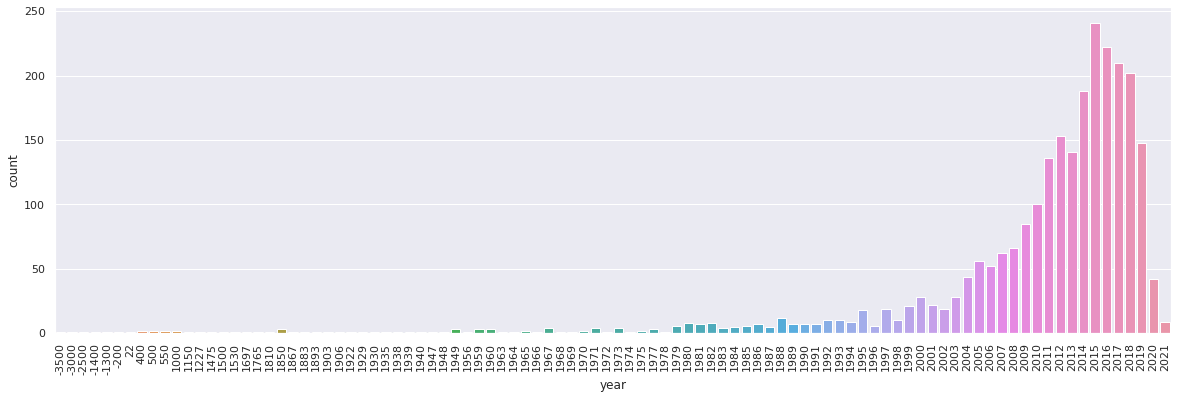

In [10]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='year', data = df_ludo);

After entering the 2000's, there was a huge boom in boardgame releases with a peak in 2015.

A box plot can help us visualize the distribution of the rank score of games by year. However, since there are games dated all the way back to -3500 (that's so extreme!), let's just pick games from 1990 forward:

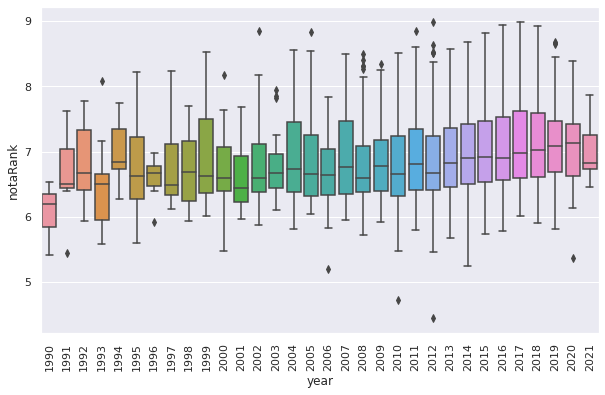

In [11]:
sns.boxplot(x='year', y = 'notaRank', data = df_ludo[df_ludo['year'] >= 1990])
plt.xticks(rotation=90);

The mean score doesn't fluctuate much. But it seems on 2012 we had the best socring game of all times (and also the worst!).

Let's inspect the same distribution for user given scores:

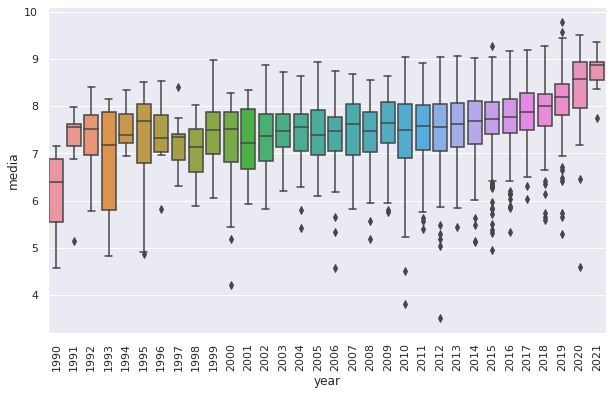

In [12]:
sns.boxplot(x='year', y = 'media', data = df_ludo[df_ludo['year'] >= 1990])
plt.xticks(rotation=90);

Now we see an increase in the mean user score steadily since 2010. It will be nice to check this against the number of users by year.

# 2- `notaRank` column

We begin by a simple histogram to see the distribution of these scores.

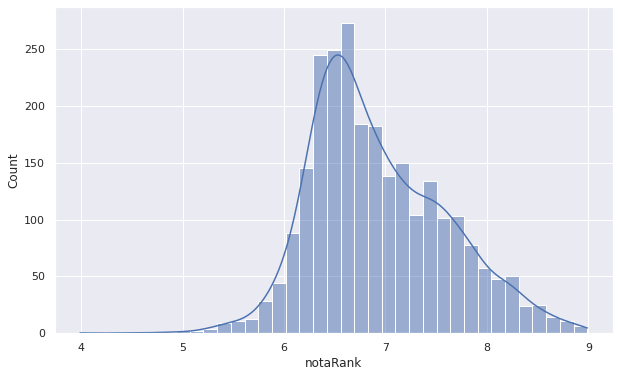

In [13]:
sns.histplot(x = 'notaRank', data = df_ludo, kde = True);

How about the scores in each domain (`dominio`)? Let's set a hue to our histogram plot and find out:

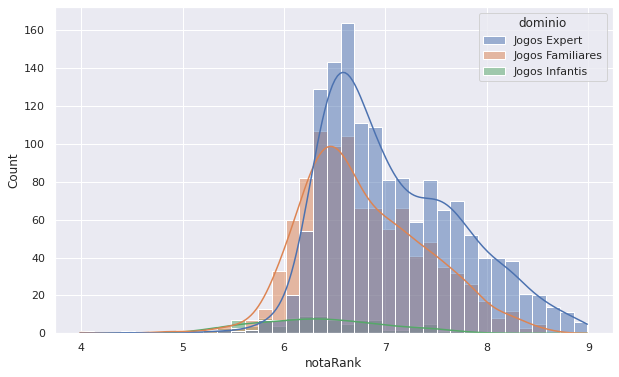

In [14]:
sns.histplot(x = 'notaRank', data = df_ludo, hue = 'dominio', kde = True);

# 3- `media` column

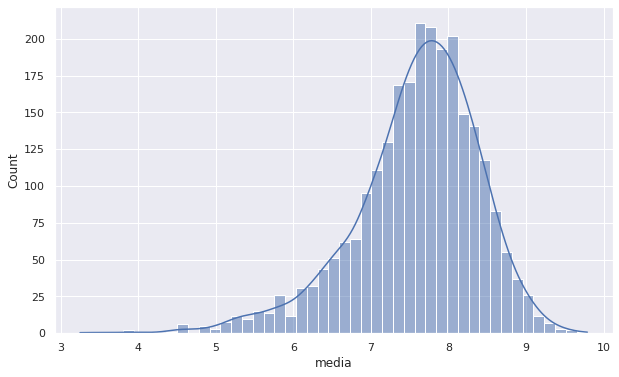

In [15]:
sns.histplot(x = 'media', data = df_ludo, kde = True);

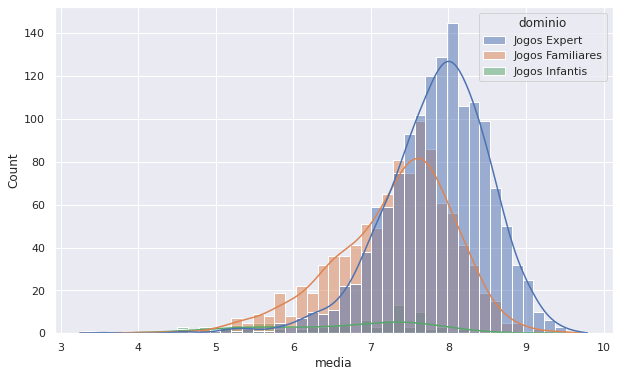

In [16]:
sns.histplot(x = 'media', data = df_ludo, hue = 'dominio', kde = True);

# 4- `notas` column

This column gives us the number of users reviewing each game. Let's start by seeing the distribution for this column as a histogram:

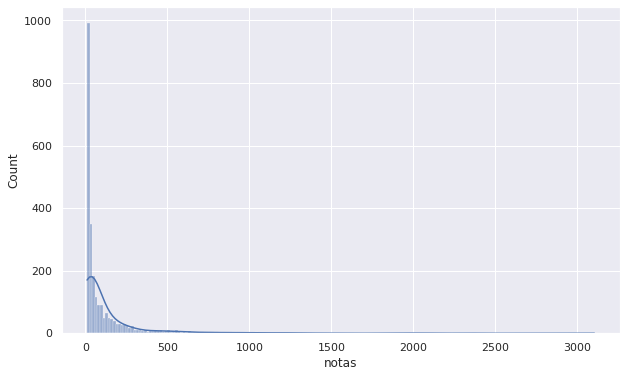

In [17]:
sns.histplot(x = 'notas', data = df_ludo, kde = True);

There seems to be a lot of games with very few reviews. We can do a `describe()` call to inspect the statistics for these column:

In [18]:
df_ludo['notas'].describe()

count    2525.000000
mean      138.080792
std       291.134945
min        10.000000
25%        17.000000
50%        36.000000
75%       125.000000
max      3104.000000
Name: notas, dtype: float64

So we have 75% of our data with up to 125 reviews, but some games reach over 3100! Let's visualize the 25% of games over 125:

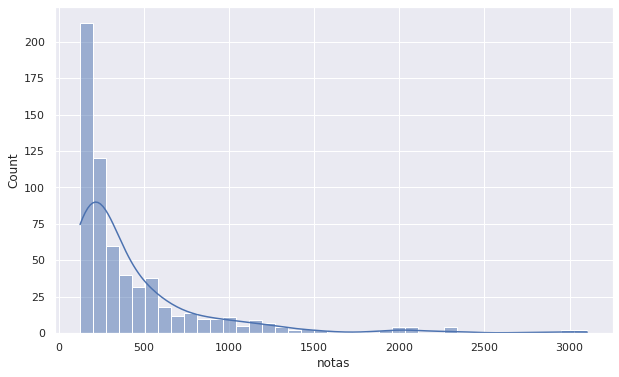

In [19]:
sns.histplot(x = 'notas', data = df_ludo[df_ludo['notas'] > 125], kde = True);

How does the position of the game related to the number of reviews:

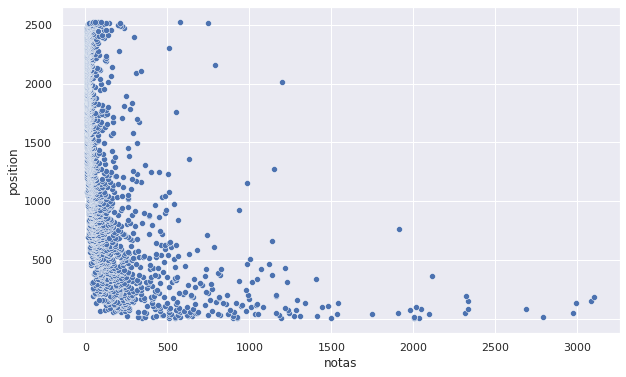

In [20]:
sns.scatterplot(data = df_ludo, x = 'notas', y = 'position');

As expected, all games with lots of reviews (over 2000) are within the top 500 games. And games with very high positions on the rank tend to have very few reviews as they are not very popular.

We can check for the relation between `notaRank`, `media` (score and user score) and the number of reviews:

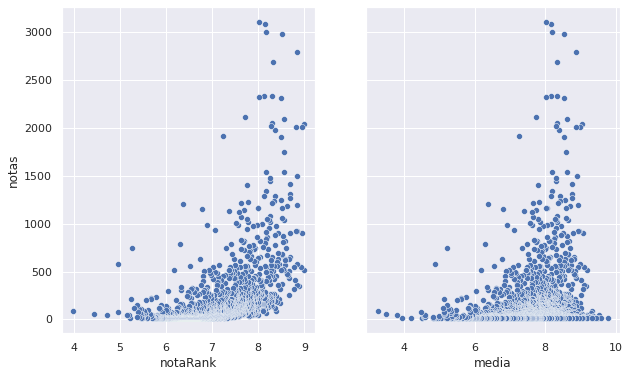

In [21]:
fig, axs = plt.subplots(1, 2, sharey = True)

sns.scatterplot(data = df_ludo, x = 'notaRank', y = 'notas', ax = axs[0])
sns.scatterplot(data = df_ludo, x = 'media', y = 'notas', ax = axs[1]);

# 5- `age` column

How many games by recommended age are there?

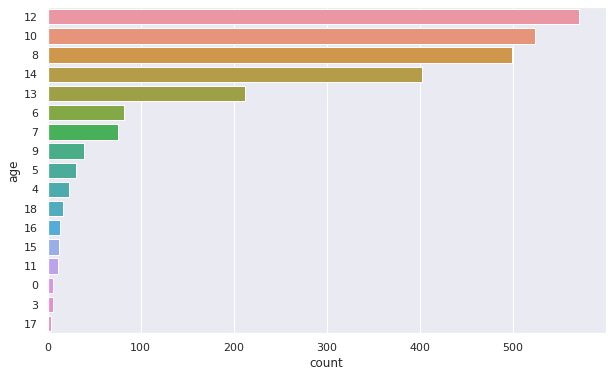

In [22]:
sns.countplot(y = 'age', data = df_ludo,
              order = df_ludo['age'].value_counts().index);

Also, we can check distribution of scores by age:

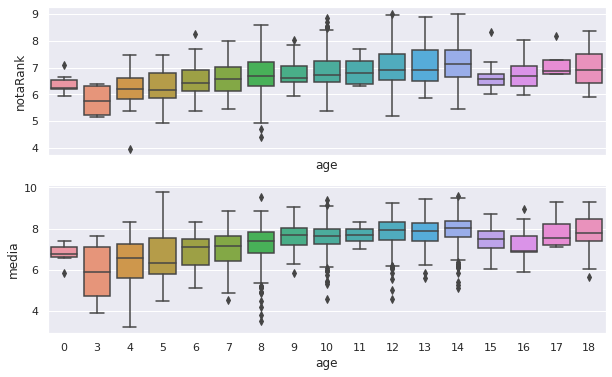

In [23]:
fig, axs = plt.subplots(2, 1, sharex=True)

sns.boxplot(x='age', y = 'notaRank', data = df_ludo, ax = axs[0])
sns.boxplot(x='age', y = 'media', data = df_ludo, ax = axs[1]);

# 6- `timeOfPlay` column


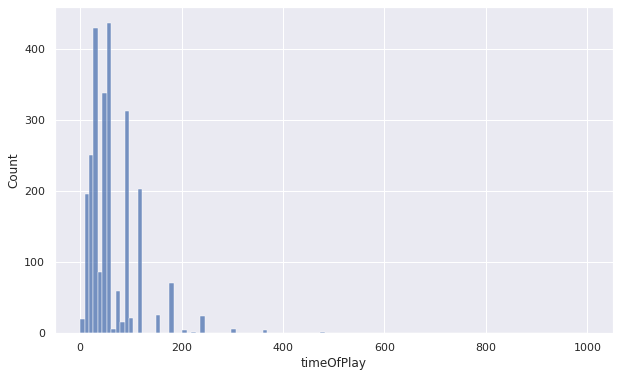

In [24]:
sns.histplot(data = df_ludo, x = 'timeOfPlay');

What are the unique values for this feature?

In [25]:
unique_times = df_ludo['timeOfPlay'].unique()
np.sort(unique_times)

array([   0,    1,    2,    5,    7,    8,   10,   13,   15,   20,   25,
         30,   35,   40,   42,   45,   50,   55,   60,   70,   75,   80,
         90,  100,  105,  110,  120,  125,  135,  150,  180,  200,  210,
        222,  240,  300,  340,  360,  420,  480,  720, 1000])

What games have 720 and 1000 min of time of play?

In [26]:
df_ludo[df_ludo['timeOfPlay'] >  700]

position              title  year  notaRank  media  notas  age  \
243        244  The 7th Continent  2017      7.88   8.83     67   12   
1471      1472  Mega Civilization  2015      6.66   8.69     11   12   

      timeOfPlay       dominio  \
243         1000  Jogos Expert   
1471         720  Jogos Expert   

                                              mecanicas           artist  \
243   Narração de Histórias,Tabuleiro Modular,Campan...    Ludovic Roudy   
1471  Colecionar Componentes,Movimento de Área,Negoc...  Franz Vohwinkel   

                         designer  \
243   Ludovic Roudy,Bruno Sautter   
1471   Flo de Haan,John Rodriguez   

                                                 imagem  minPlayers  \
243   https://storage.googleapis.com/ludopedia-capas...           1   
1471  https://storage.googleapis.com/ludopedia-capas...           5   

      maxPlayers                                     shared_artists  \
243            4                                                      
1471          18  10,39,125,147,154,162,240,260,320,333,365,379,...   

     shared_designers plusOneArtist  games_with_sa  games_with_posa  
243               277                            0                0  
1471                                            74                0

From the game's (The 7th Continent) description:
> Unlike most board games, it will take you many, MANY hours of exploring and searching the seventh continent until you eventually discover how to remove the curse(s)...or die trying.
The 7th Continent features an easy saving system so that you can stop playing at any time and resume your adventure later on, just like in a video game!

And, from Mega Civilization:
> A game of Mega Civilization can take 10-12 hours to complete. Players can also choose to play the beginner scenario — "The First Game" — which takes only 1-2 hours. Another scenario — "The Short Game" — provides the same excitement as the full game, although the game starts in a later age; by doing this, games can be played in "only" 6-8 hours.

Is there a connection between age and time of play?

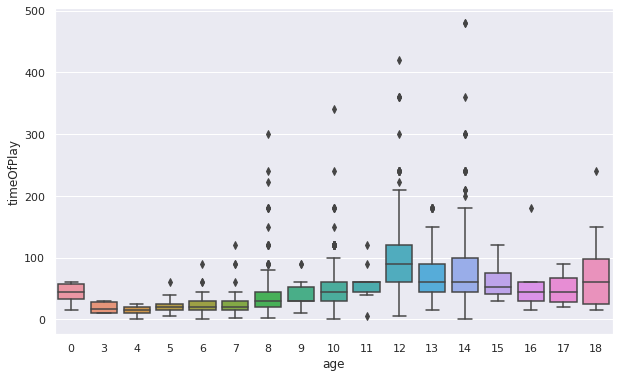

In [27]:
sns.boxplot(data=df_ludo[df_ludo['timeOfPlay']<600], x='age', y = 'timeOfPlay');

# 7- `dominio` column

How are games distributed across domains?

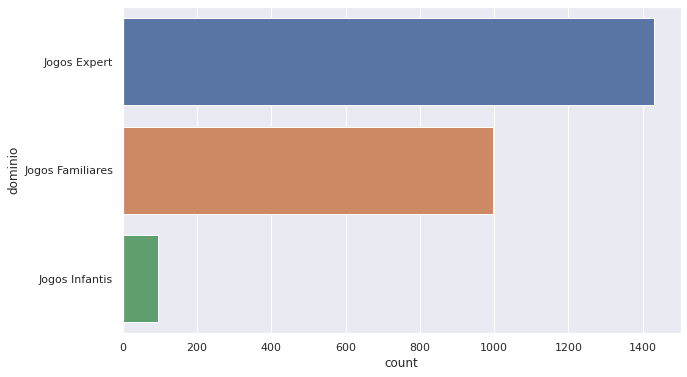

In [28]:
sns.countplot(y = 'dominio', data = df_ludo);

And for the distribution of scores in each domain:

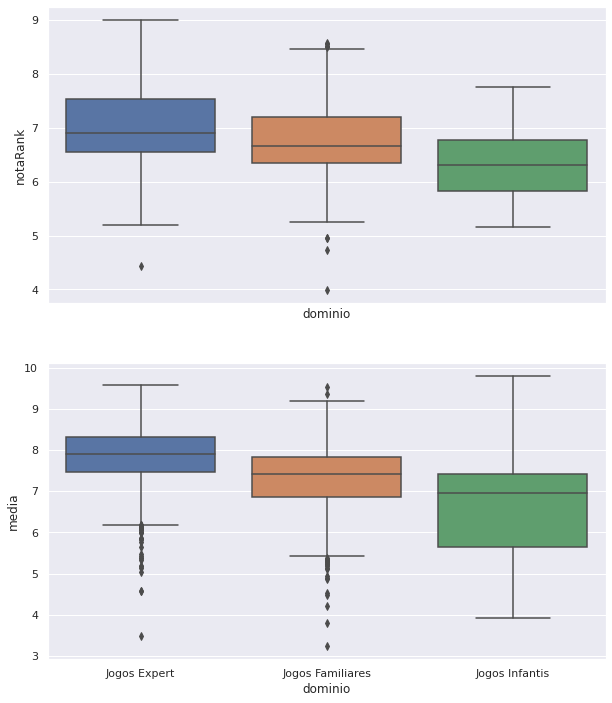

In [29]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,12))

sns.boxplot(x='dominio', y = 'notaRank', data = df_ludo, ax = axs[0])
sns.boxplot(x='dominio', y = 'media', data = df_ludo, ax = axs[1]);

# 8- `mecanicas` column

It is not straightforward to see the number of unique artists (or designers or mechanics...). But we can use a helper function to do so:

In [30]:
def uniques(feature):
    '''
    Takes a string 'feature' and returns a set of unique
    features in the entire df.
    '''
    unique_feat = set()
    for i in df_ludo[feature]:
        feats = set(i.split(','))
        unique_feat.update(feats)

    print('Number of unique '+feature+':' ,len(unique_feat))
    return unique_feat

Basically, the function loops through the `feature` column and updates a set containing all entries within each row. As sets don't allow for duplicates, we end up with a iterable containing only unique items of that feature. The function returns this set and prints the number of items in it (using `len()`).

In [31]:
unique_mecanicas = uniques('mecanicas')

Number of unique mecanicas: 55


Now, I would like to know how is the distribution of, say, the average score given by users (the `media` column) for games with a specific mechanics.

For this, we can write another helper function:

In [32]:
def make_dist(df, feature):
    '''
    Function to plot a histogram of the distribution of 'feature' within 'df'.
    '''
    # Check distribution of feature:
    mean_feat = df[feature].mean()
    num_of_values = len(df)

    fig = px.histogram(df, x=feature,
                       title='Mean value of ' +feature+ ': ' +str(round(mean_feat,2))+
                           ' - (with '+str(num_of_values)+' games)',
                       opacity = 0.6)

    fig.show()

We test out this function to see the distribution of `media` in all games with a `cooperativo` mechanics:

In [33]:
make_dist(df_ludo.loc[df_ludo['mecanicas'].str.contains('Cooperativo')], 'media')

Some other interesting data we can explore is the count of how many games contain each unique mechanics (`mecanica`).

We can create a dictionary to count the appereance of each unique mechanics in the dataframe:

In [34]:
count_mecanicas = {}
for mec in unique_mecanicas:
    count_mecanicas[mec] = len(df_ludo.loc[df_ludo['mecanicas'].str.contains(mec)])

In [35]:
count_mecanicas

{'Colocação de Peças': 371,
 'Movimento de Área': 210,
 'Negociação': 156,
 'Eliminação de Jogadores': 101,
 'Reconhecimento de Padrão': 79,
 'Movimento em Grades': 149,
 'Marcadores e Hexágonos': 24,
 'Mercado de Ações': 49,
 'Construção a partir de Modelo': 86,
 'Votação': 57,
 'Linha de Tempo': 37,
 'Pegar e Entregar': 86,
 'Sistema por Impulsos': 4,
 'Papel e Caneta': 50,
 'Colecionar Componentes': 494,
 'Sistema de Pontos de Ação': 193,
 'Narração de Histórias': 78,
 'Toma essa': 156,
 'Pedra': 18,
 'Cantar': 6,
 'Ação / Movimento Programado': 93,
 'Leilão': 183,
 'Impulso de Área': 12,
 'Alocação de Trabalhadores': 303,
 'Memória': 114,
 'Posicionamento Secreto': 74,
 'Rolar e Mover': 95,
 'Desenhar': 23,
 'Ação Simultânea': 210,
 'Seleção de Cartas': 442,
 'Atuação': 36,
 'Campanha/ Batalhas Dirigidas por Cartas': 93,
 'Desenhar Rota com Lápis': 6,
 ' Papel e Tesoura': 18,
 'Simulação': 47,
 'Tempo real': 83,
 'Apostas': 65,
 'Blefe': 193,
 'Construção de Rotas': 134,
 'Jogo em 

To better visualize this, we can create a dataframe object and plot it with seaborn as a barplot:

In [36]:
mec_df = pd.DataFrame(count_mecanicas.items(), columns=['mecanica', 'games_count'])
# Sorting
mec_df = mec_df.sort_values(by=['games_count'], ascending = False)

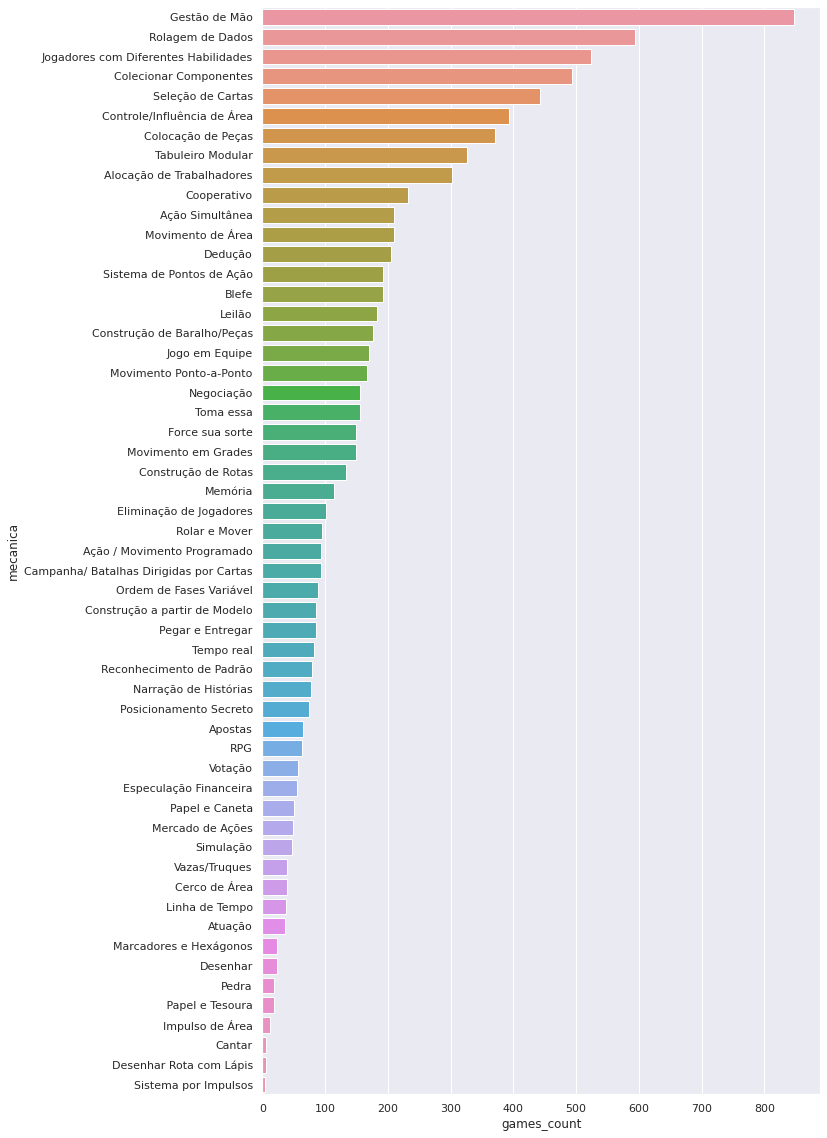

In [37]:
plt.figure(figsize=(10,20))
sns.barplot(x = 'games_count', y = 'mecanica', data = mec_df);

# 9- `artist` column

In [38]:
unique_artists = uniques('artist')

Number of unique artist: 2442


We can get a similar plot for the artists, however, since there are 2442 unique artists, we can filter the top ones. Since we can do the same for designers, let's create a helper function for the process.

In [39]:
# Define a function for this
def plot_uniques(df, unique_values, feature, max_plot=20):
    '''
    Plots a horizonatl bar plot for the value count of unique features.
    Returns a dataframe with two columns: [feature, games_count]
    This second column counts the number of games containing that feature.
    
    '''
    count_feat = {}
    for val in unique_values:
        count_feat[val] = len(df.loc[df[feature].str.match(val)])
    
    feat_df = pd.DataFrame(count_feat.items(), columns=[feature, 'games_count'])
    feat_df = feat_df.sort_values(by=['games_count'], ascending = False)
    
    plt.figure(figsize=(10,10))
    sns.barplot(x = 'games_count', y = feature, data = feat_df.head(max_plot))
    
    return feat_df

For the top 20 artists:

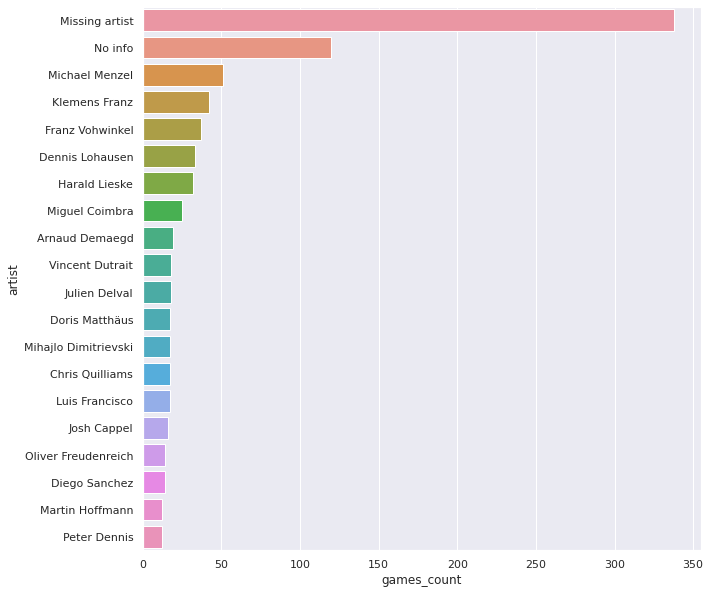

In [40]:
artist_df = plot_uniques(df_ludo, unique_artists, 'artist', max_plot=20)

As expected, the top 2 most occuring artists are `Missing artist` and `No info`. Let's filter this ones:

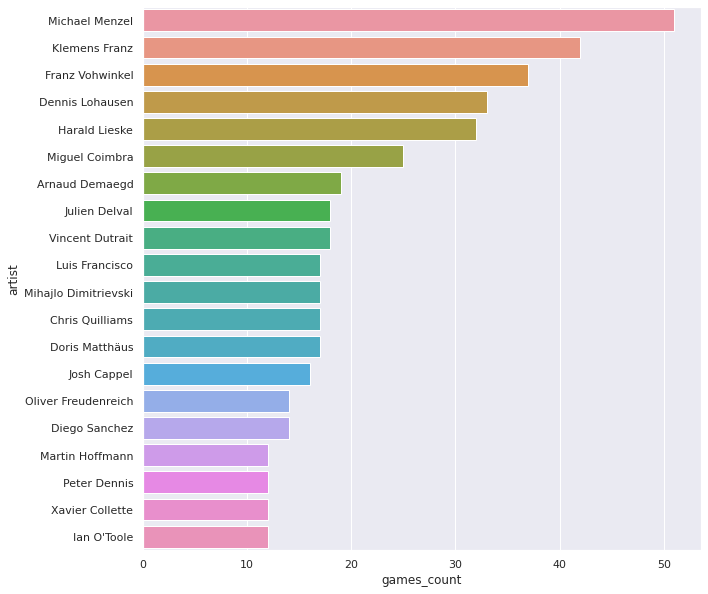

In [41]:
artist_df = plot_uniques(df_ludo[(df_ludo['artist'] != 'No info') & (df_ludo['artist'] != 'Missing artist')], unique_artists, 'artist', max_plot=20)

# 10- `designer` column

We'll do the same visuals as for the `artist` column.

In [42]:
unique_designers = uniques('designer')

Number of unique designer: 1526


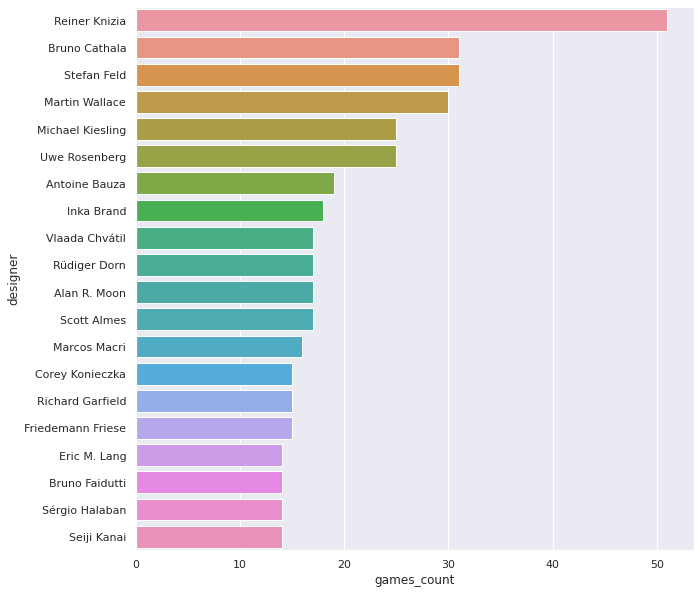

In [43]:
designer_df = plot_uniques(df_ludo[df_ludo['designer'] != 'No info'], unique_designers, 'designer', max_plot=20)

# 11- `minPlayers` and `maxPlayers` columns

We can check for the unique values of both columns to get a general idea of the data:

In [44]:
np.sort(df_ludo['minPlayers'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8])

In [45]:
np.sort(df_ludo['maxPlayers'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
        15,  16,  18,  20,  21,  22,  24,  30,  36,  50,  68,  75,  99,
       100])

Something is off here: there is a game with `maxPlayers = 0`. Let's inspect:

In [46]:
df_ludo[df_ludo['maxPlayers']==0]

position                 title  year  notaRank  media  notas  age  \
2392      2394  Pictureka! Card Game  2008      6.05   6.06     99    6   

      timeOfPlay           dominio                            mecanicas  \
2392          15  Jogos Familiares  Reconhecimento de Padrão,Tempo real   

                 artist      designer  \
2392  Eugene and Louise  Arne Lauwers   

                                                 imagem  minPlayers  \
2392  https://storage.googleapis.com/ludopedia-capas...           2   

      maxPlayers shared_artists shared_designers plusOneArtist  games_with_sa  \
2392           0           2049             2049                            1   

      games_with_posa  
2392                0

It appears to be an error on the [Ludopedia](https://www.ludopedia.com.br/jogo/pictureka-card-game?v=arquivos) website. Checking out [BGG](https://boardgamegeek.com/boardgame/53317/pictureka-card-game), we can see the `maxPlayers` should be 20. We can change that now:

In [47]:
df_ludo.at[2392, 'maxPlayers'] = 20

Now to see if everything is ok with the column:

In [48]:
np.sort(df_ludo['maxPlayers'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  15,
        16,  18,  20,  21,  22,  24,  30,  36,  50,  68,  75,  99, 100])

To get some visuals let's create a count plot for each of these columns:

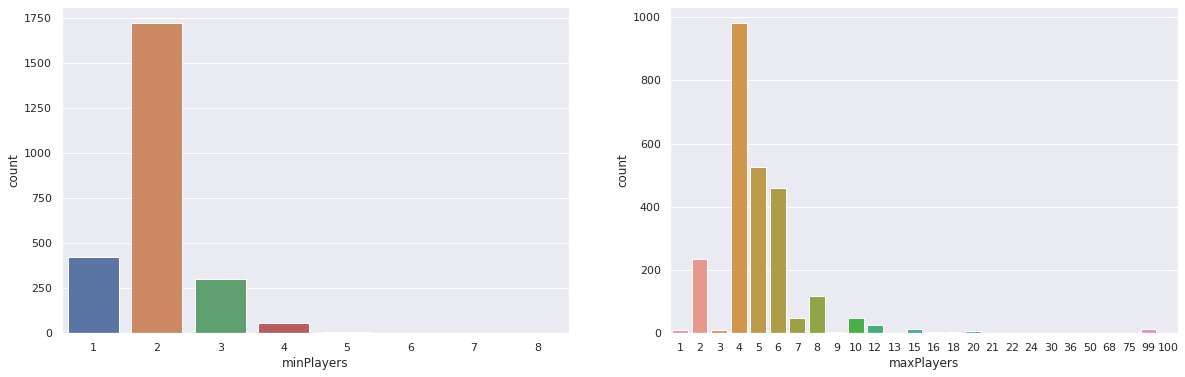

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='minPlayers', data = df_ludo, ax = axs[0])
sns.countplot(x='maxPlayers', data = df_ludo, ax = axs[1]);

Also, we can check the distribution of scores for each number of players:

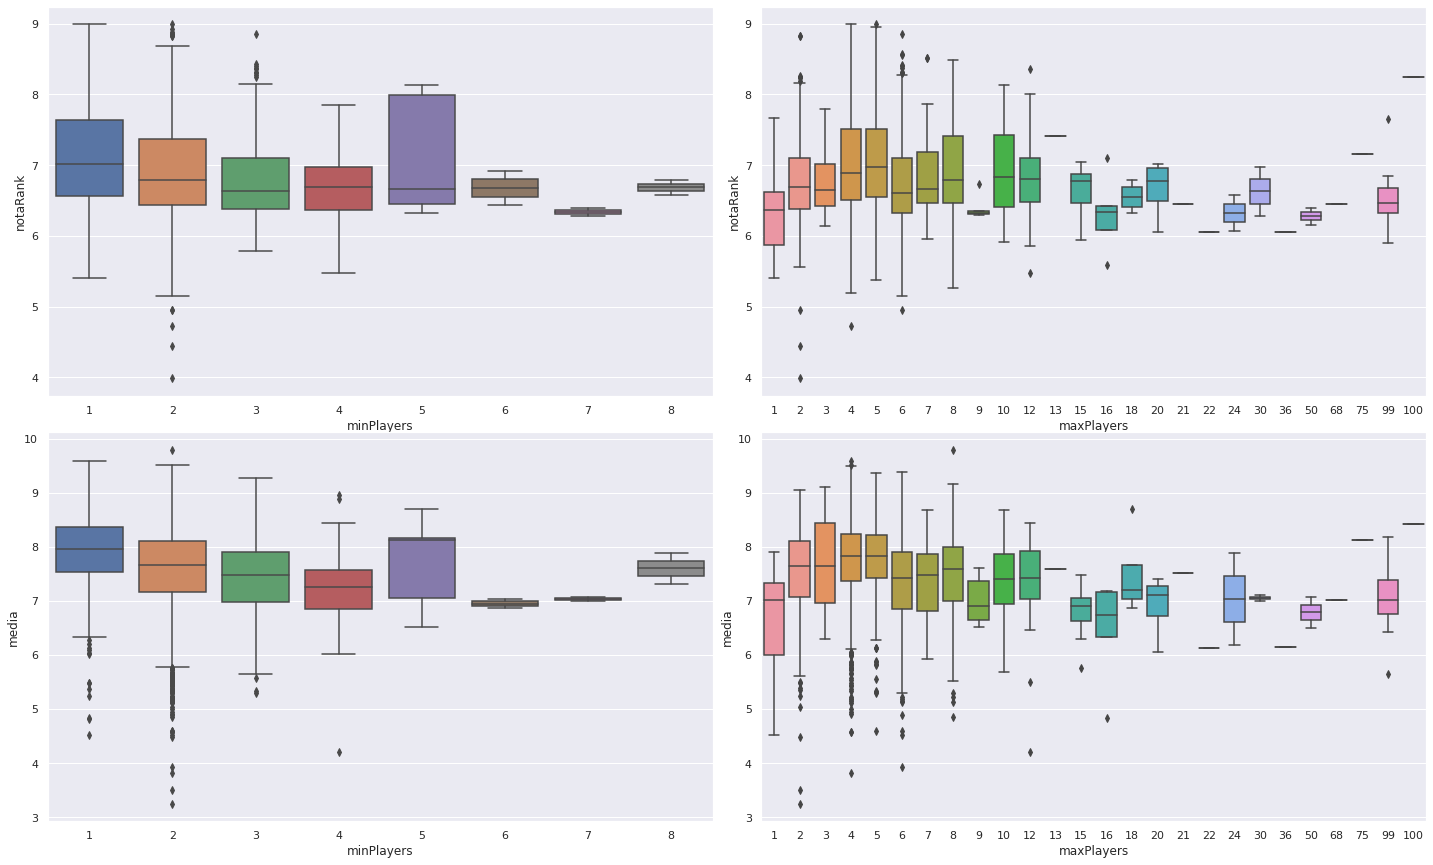

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(20,12))
fig.tight_layout()

sns.boxplot(x='minPlayers', y = 'notaRank', data = df_ludo, ax = axs[0,0])
sns.boxplot(x='maxPlayers', y = 'notaRank', data = df_ludo, ax = axs[0,1])

sns.boxplot(x='minPlayers', y = 'media', data = df_ludo, ax = axs[1,0])
sns.boxplot(x='maxPlayers', y = 'media', data = df_ludo, ax = axs[1,1]);

# 12- Shared artists

There are two columns with numeric values about shared artists:
* `games_with_sa` - amount of games that share at least one artist with the given game
* `games_with_posa` - amount of games that share more than one artist with the given game

We can see a distribution for these two features. However, we want to keep in mind it will not be useful to consider games with no information on artists that "share artists" with other games with missing info (that is, we want to exclude those games with `No info` or `Missing artist` in the `artist` column).

Also, let's exclude from our plots those games that don't share any artist with other games:

In [51]:
# Df for relevant info on shared artists
df_sa = df_ludo[((df_ludo['artist']=='No info') 
        | (df_ludo['artist']=='Missing artist') 
        | (df_ludo['shared_artists']=='')) == False]

For games with at least one shared artist:

<AxesSubplot:xlabel='games_with_sa', ylabel='Density'>

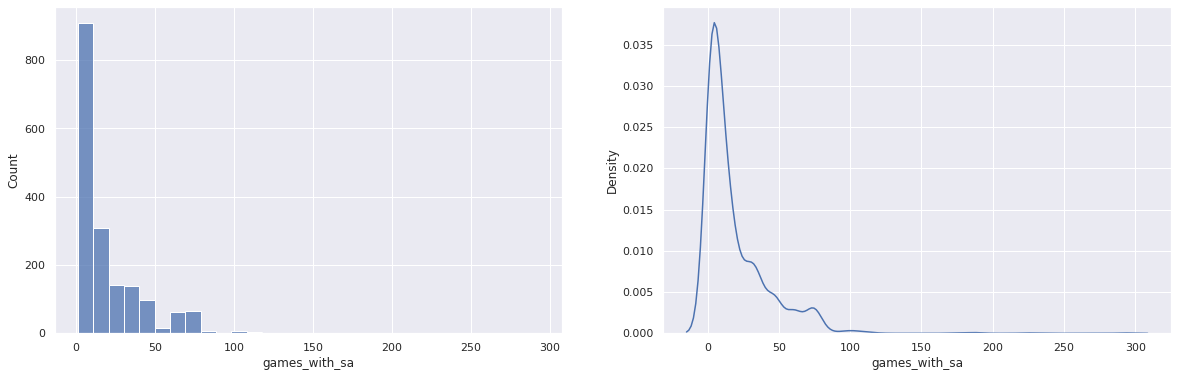

In [52]:
fig, axs = plt.subplots(1,2, figsize=(20,6))

sns.histplot(data = df_sa, x='games_with_sa', bins = 30, ax = axs[0]);
sns.kdeplot(data = df_sa, x='games_with_sa', ax = axs[1])

Let's see some numbers for this distribution:

In [53]:
df_sa['games_with_sa'].describe()

count    1761.000000
mean       18.948325
std        23.412049
min         1.000000
25%         4.000000
50%        10.000000
75%        28.000000
max       293.000000
Name: games_with_sa, dtype: float64

For games that share more than one artists, we can get the same type of count.

**Note**: we only want to see games with more than one game sharing more than one artist. So, we use `df_ludo[df_ludo['games_with_posa']>0]` to filter our dataframe before plotting.

<AxesSubplot:xlabel='games_with_posa', ylabel='Density'>

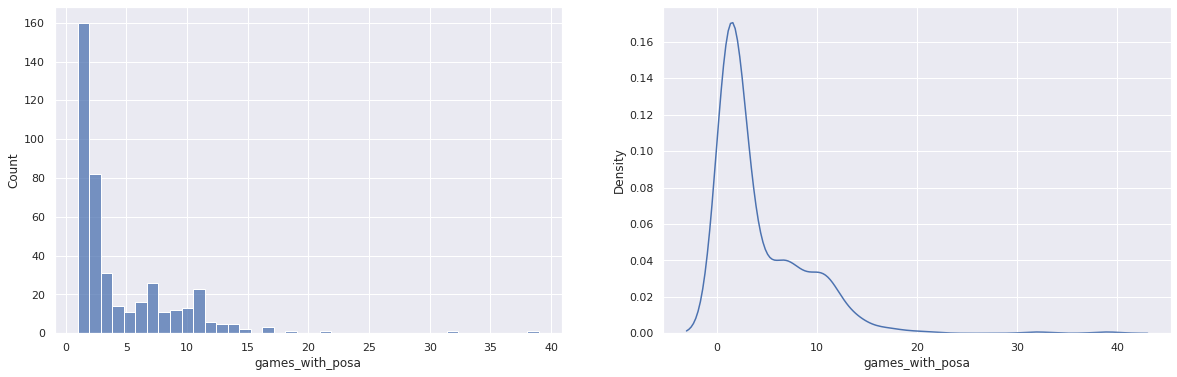

In [54]:
fig, axs = plt.subplots(1,2, figsize=(20,6))

sns.histplot(data = df_ludo[df_ludo['games_with_posa']>0], x='games_with_posa', bins = 40, ax = axs[0]);
sns.kdeplot(data = df_ludo[df_ludo['games_with_posa']>0], x='games_with_posa', ax = axs[1])

And for the numbers:

In [55]:
df_ludo[df_ludo['games_with_posa']>0]['games_with_posa'].describe()

count    424.000000
mean       4.207547
std        4.540789
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max       39.000000
Name: games_with_posa, dtype: float64

# 13- Pairplot

To finish off our EDA let's use a `pairplot` to see all relations between features:

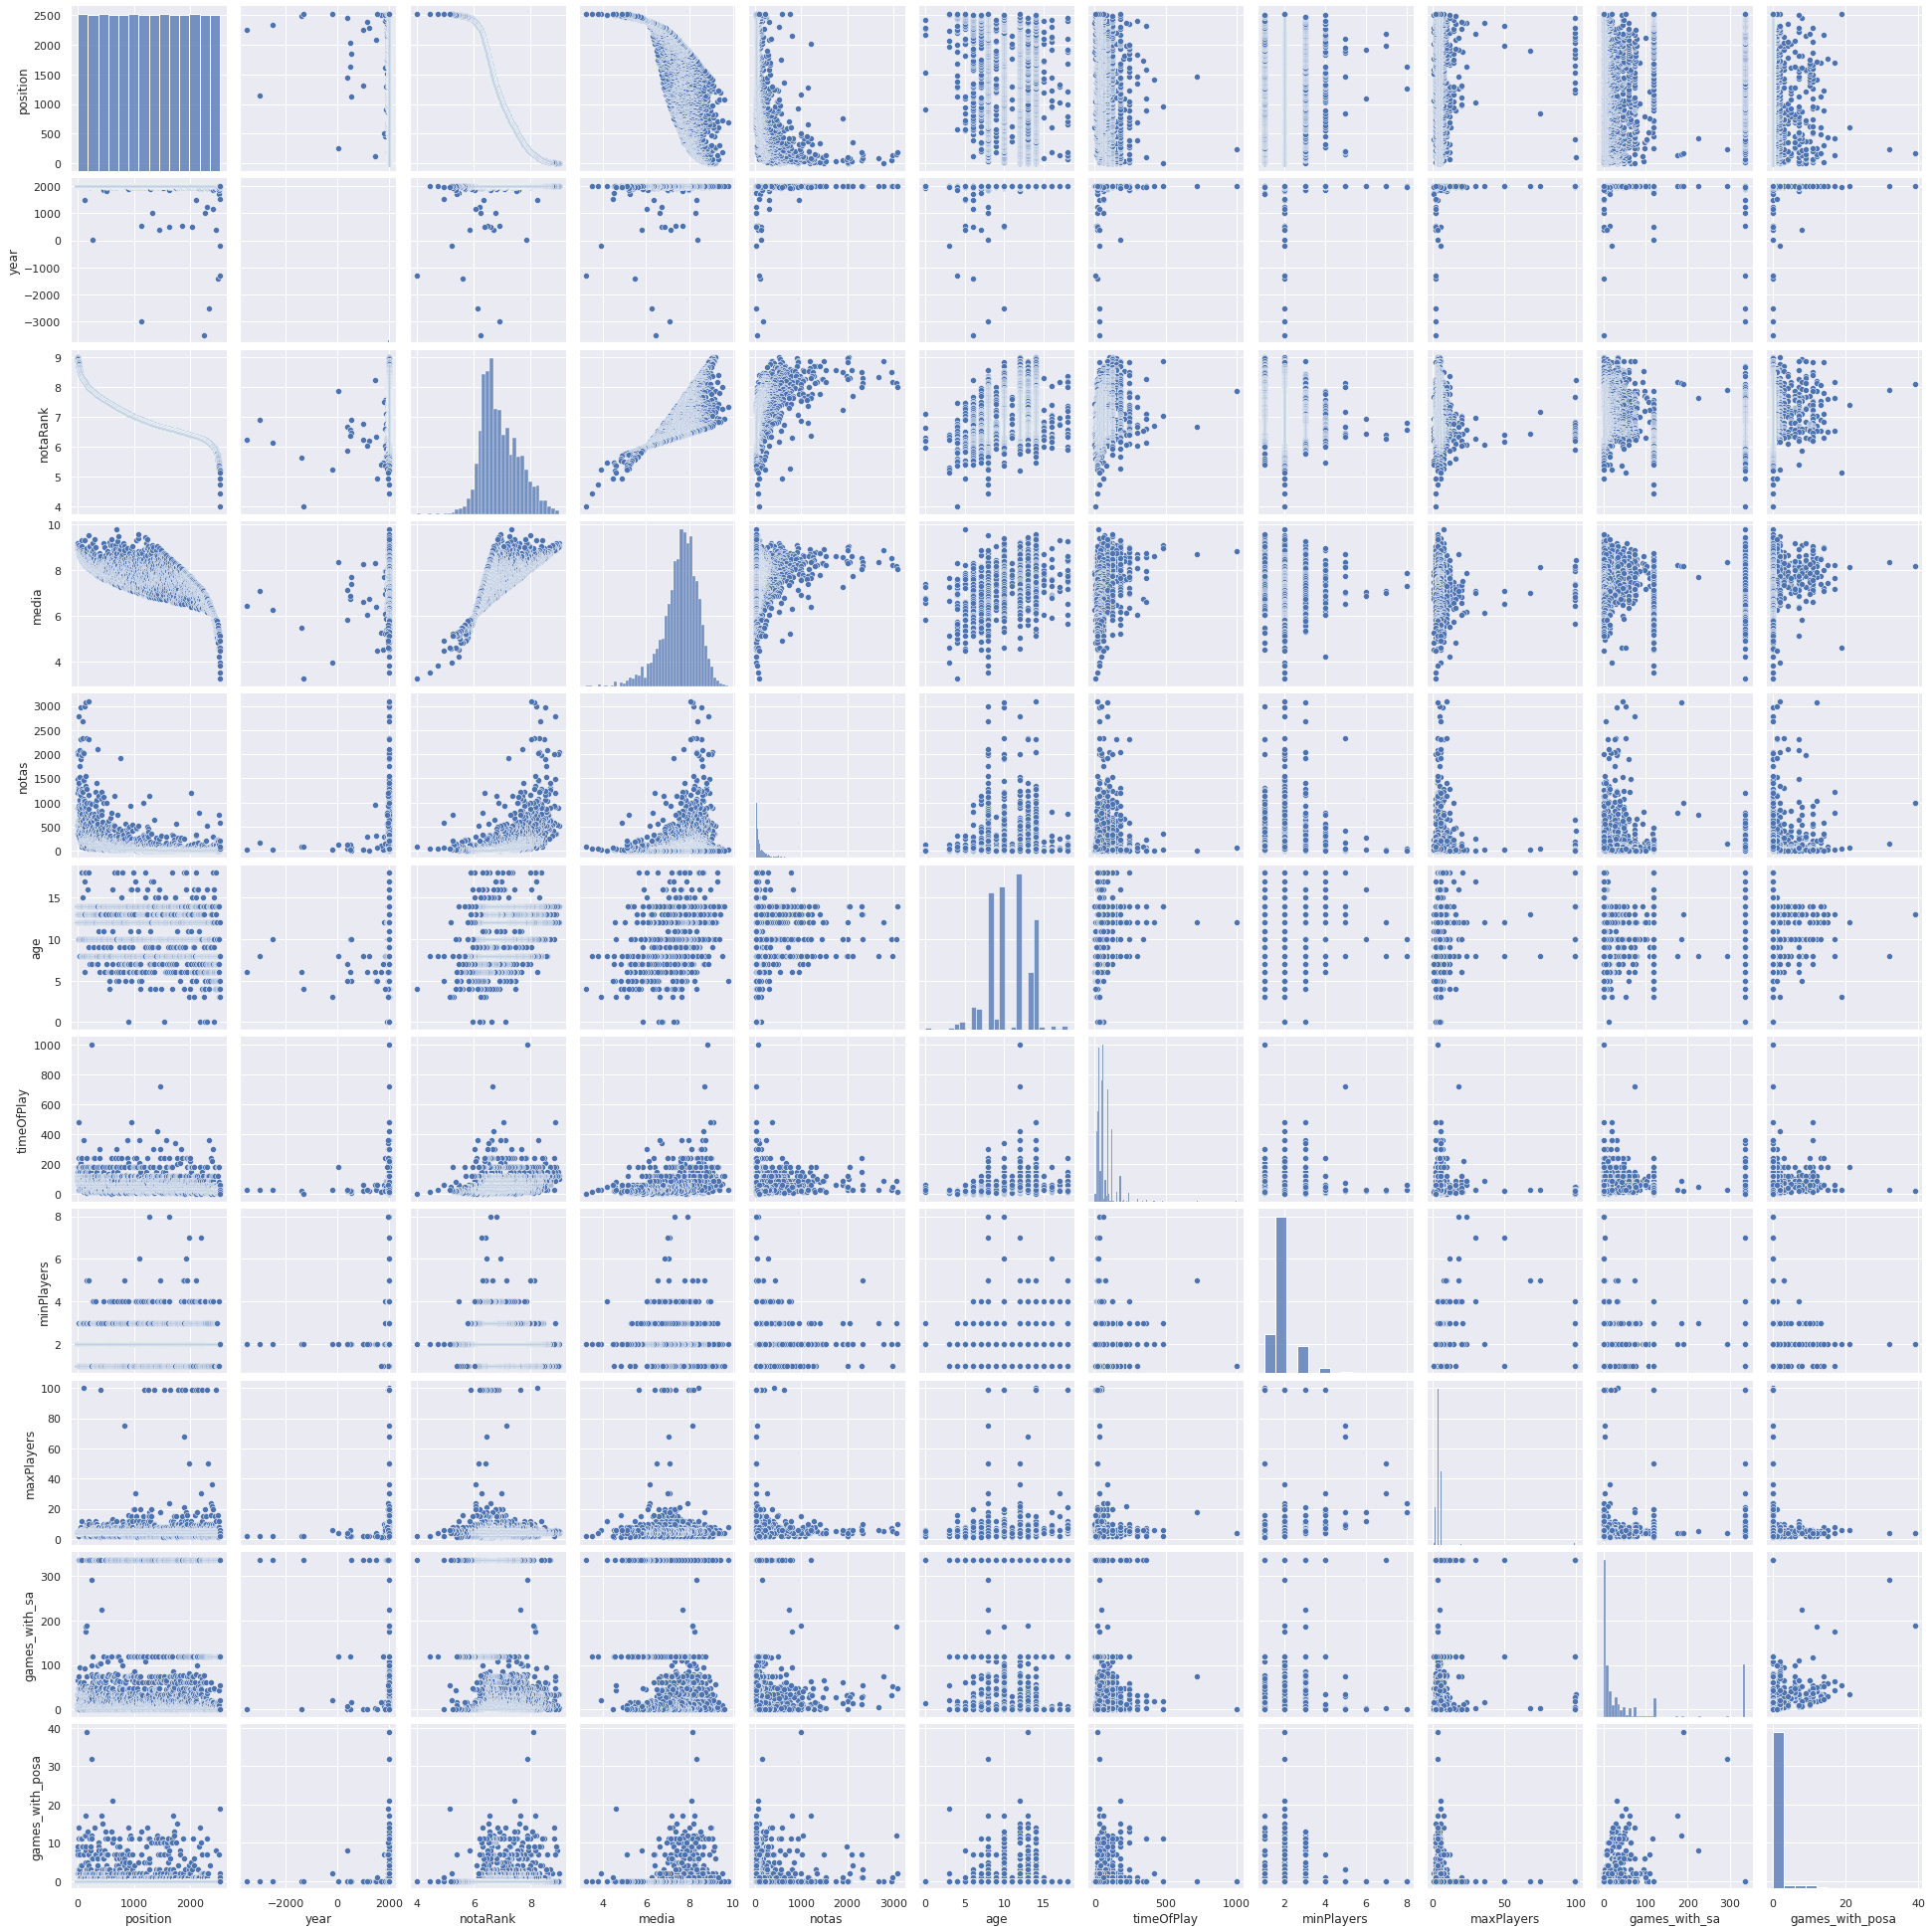

In [56]:
sns.pairplot(data=df_ludo)

# 14- Modeling

Now that we are a bit more familiar with our data, we can build a model to see what can we predict from our games.

As we have a few numeric features (namely, age, time of play, number of players and year of release) and a domain feature with only three classes, we can create a model to predict the domain of a game based on our simple numerical features.

## 14.1- Setting up the features and target

For simplicity (and to avoid a huge class imbalance) we will group together the classes `Jogos Familiares` and `Jogos Infantis` into a single class called `Casual`.

We will focus on using tree-based classifiers for their simplicity (and because they are my favorite models!) and because there is no clear linear or polynomial relation between our features and target.

In [57]:
df_ludo.head()

position              title  year  notaRank  media  notas  age  timeOfPlay  \
0         1         Gloomhaven  2017      8.99   9.19    512   12         120   
1         2      Terra Mystica  2012      8.99   9.04   2036   14         100   
2         3       Gaia Project  2017      8.96   9.07    898   14         150   
3         4  Terraforming Mars  2016      8.95   9.00   2005   12         120   
4         5  Brass: Birmingham  2018      8.93   9.11    547   14         120   

        dominio                                          mecanicas  \
0  Jogos Expert  Ação Simultânea,Gestão de Mão,Cooperativo,Joga...   
1  Jogos Expert  Jogadores com Diferentes Habilidades,Construçã...   
2  Jogos Expert  Construção de Rotas,Jogadores com Diferentes H...   
3  Jogos Expert  Gestão de Mão,Colocação de Peças,Jogadores com...   
4  Jogos Expert                  Construção de Rotas,Gestão de Mão   

                                           artist  \
0  Alexandr Elichev,Josh T. McDowell,Alvaro Nebot   
1                                 Dennis Lohausen   
2                                 Dennis Lohausen   
3                                 Isaac Fryxelius   
4     Lina Cossette,David Forest,Damien Mammoliti   

                                 designer  \
0                          Isaac Childres   
1         Jens Drögemüller,Helge Ostertag   
2         Jens Drögemüller,Helge Ostertag   
3                         Jacob Fryxelius   
4  Gavan Brown,Matt Tolman,Martin Wallace   

                                              imagem  minPlayers  maxPlayers  \
0  https://storage.googleapis.com/ludopedia-capas...           1           4   
1  https://storage.googleapis.com/ludopedia-capas...           2           5   
2  https://storage.googleapis.com/ludopedia-capas...           1           4   
3  https://storage.googleapis.com/ludopedia-capas...           1           5   
4  https://storage.googleapis.com/ludopedia-capas...           2           4   

                                      shared_artists  \
0                                           729,1005   
1  2,23,28,68,71,87,100,106,165,211,215,235,240,2...   
2  1,23,28,68,71,87,100,106,165,211,215,235,240,2...   
3                                                      
4                5,133,223,377,481,871,882,1352,1810   

                                    shared_designers  \
0                                      729,1005,1282   
1                                             2,1525   
2                                             1,1525   
3                                                      
4  5,94,163,347,382,401,432,647,726,820,867,882,9...   

                    plusOneArtist  games_with_sa  games_with_posa  
0                        729,1005              2                2  
1                                             35                0  
2                                             35                0  
3                                              0                0  
4  5,133,223,377,481,871,882,1810              9                8

Selecting our features and target:

In [58]:
df_model = df_ludo[['age','timeOfPlay','minPlayers','maxPlayers','dominio']].copy()

In [59]:
df_model.head()

age  timeOfPlay  minPlayers  maxPlayers       dominio
0   12         120           1           4  Jogos Expert
1   14         100           2           5  Jogos Expert
2   14         150           1           4  Jogos Expert
3   12         120           1           5  Jogos Expert
4   14         120           2           4  Jogos Expert

Let's plot the number of games per domain (`dominio`) to see the imbalance between the three classes:

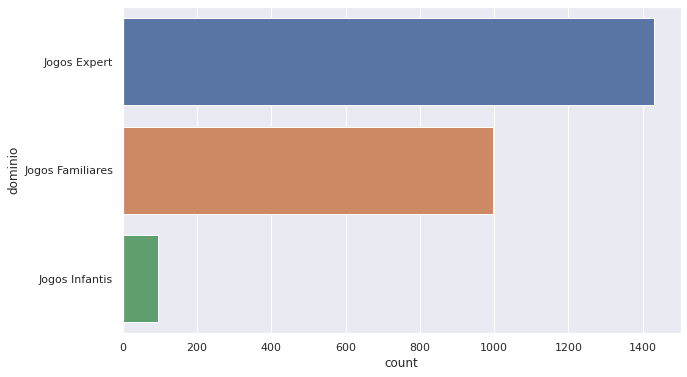

In [60]:
sns.countplot(y = 'dominio', data = df_model);

Now, to avoid dealing with this kind of imbalance (and because it makes sense in the case of boardgames) we will only care about games being **expert** or **casual**:

In [61]:
# Build two categories: Expert and Casual (counting both Familiares and Infantis)
df_model['dominio'] = df_model['dominio'].apply(lambda s: 'Expert' if s == 'Jogos Expert' else 'Casual')

In [62]:
df_model.head()

age  timeOfPlay  minPlayers  maxPlayers dominio
0   12         120           1           4  Expert
1   14         100           2           5  Expert
2   14         150           1           4  Expert
3   12         120           1           5  Expert
4   14         120           2           4  Expert

Doing the count plot again to check for the final number of games in each class:

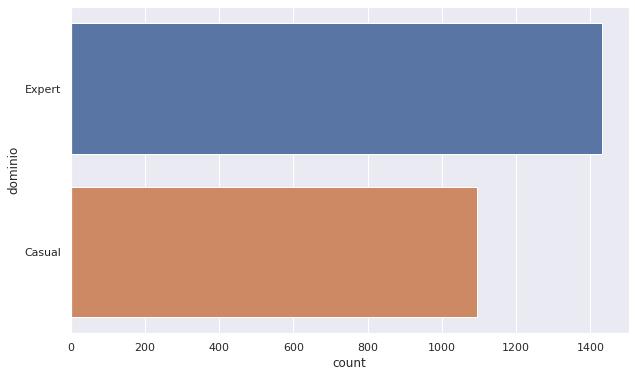

In [63]:
sns.countplot(y = 'dominio', data = df_model);

In [64]:
df_model['dominio'].describe()

count       2525
unique         2
top       Expert
freq        1431
Name: dominio, dtype: object

Now our dataset is not terribly imbalanced and we can start doing some modeling.

Before that, let's just do a simple pairplot to see relations between our features and use the target `domain` as hue in our plot:

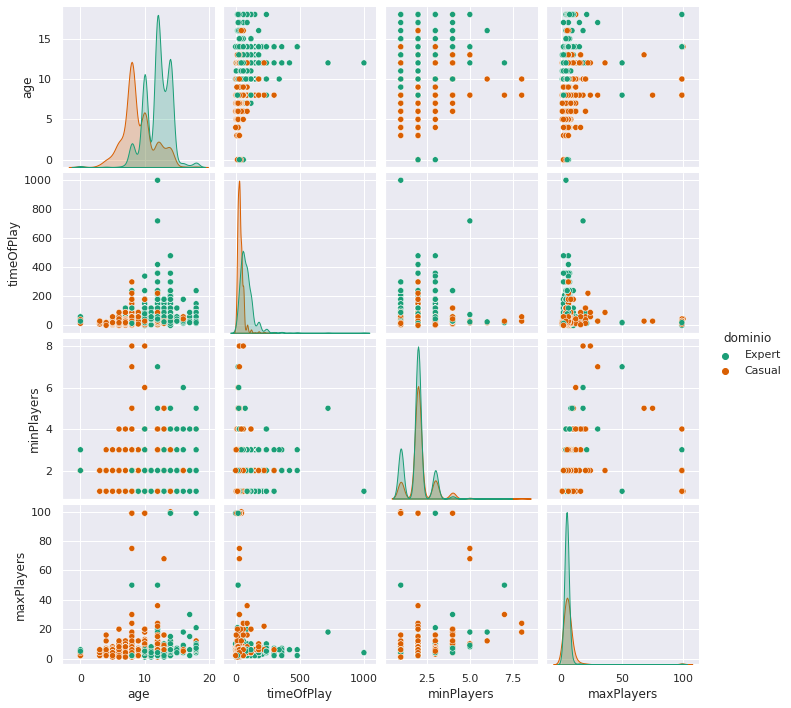

In [65]:
sns.pairplot(data=df_model, hue='dominio',palette='Dark2');

## 14.2- Train-test split

In [66]:
X = df_model.drop('dominio',axis=1)
y = df_model['dominio']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

## 14.3- Building a simple decision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_clf = DecisionTreeClassifier()

In [71]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
base_preds = dt_clf.predict(X_test)

### Evaluating base model

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

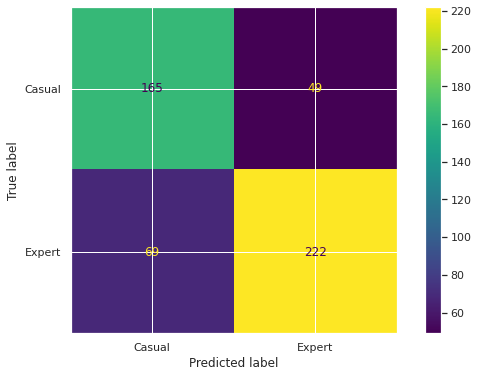

In [74]:
plot_confusion_matrix(dt_clf,X_test,y_test)

In [75]:
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

      Casual       0.71      0.77      0.74       214
      Expert       0.82      0.76      0.79       291

    accuracy                           0.77       505
   macro avg       0.76      0.77      0.76       505
weighted avg       0.77      0.77      0.77       505



In [76]:
dt_clf.feature_importances_

array([0.23854891, 0.58542979, 0.05802103, 0.11800027])

In [77]:
pd.DataFrame(index=X.columns,data=dt_clf.feature_importances_,columns=['Feature Importance'])

Feature Importance
age                   0.238549
timeOfPlay            0.585430
minPlayers            0.058021
maxPlayers            0.118000

#### Visualizing the decision tree

In [78]:
from sklearn.tree import plot_tree

In [79]:
# plt.figure(figsize=(12,8),dpi=150)
# plot_tree(dt_clf,filled=True,feature_names=X.columns);
## It was a huuuuge tree!

## 14.4- Tuning our tree

First of all, let's write a helper function to get our metrics based on the choice of model. We will use a keyword argument `visual` set as **False** by default to allow the tree to be plotted.

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
def report_model(model, visual = False):
    model_preds = model.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test,model_preds))
    print(60*'=')
    print(classification_report(y_test, model_preds))
    print(60*'=')
    plot_confusion_matrix(model, X_test, y_test)
    if visual:
        print('\n')
        plt.figure(figsize=(12,8),dpi=150)
        plot_tree(model,filled=True,feature_names=X.columns);

### Creating a pruned tree - setting max_depth

So far, visualizing our tree is difficult because the model created is very deep. We can set the `max_depth` parameter to allow for very shallow trees and see the decision process:

In [82]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Accuracy:  0.7920792079207921
              precision    recall  f1-score   support

      Casual       0.74      0.78      0.76       214
      Expert       0.83      0.80      0.82       291

    accuracy                           0.79       505
   macro avg       0.79      0.79      0.79       505
weighted avg       0.79      0.79      0.79       505





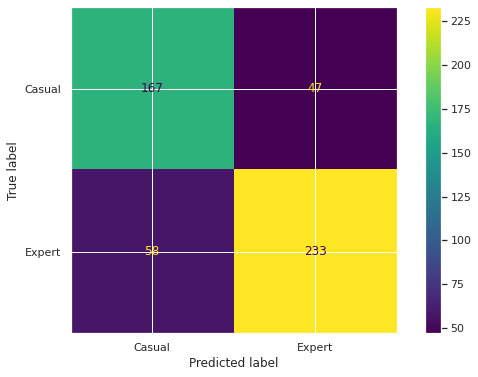

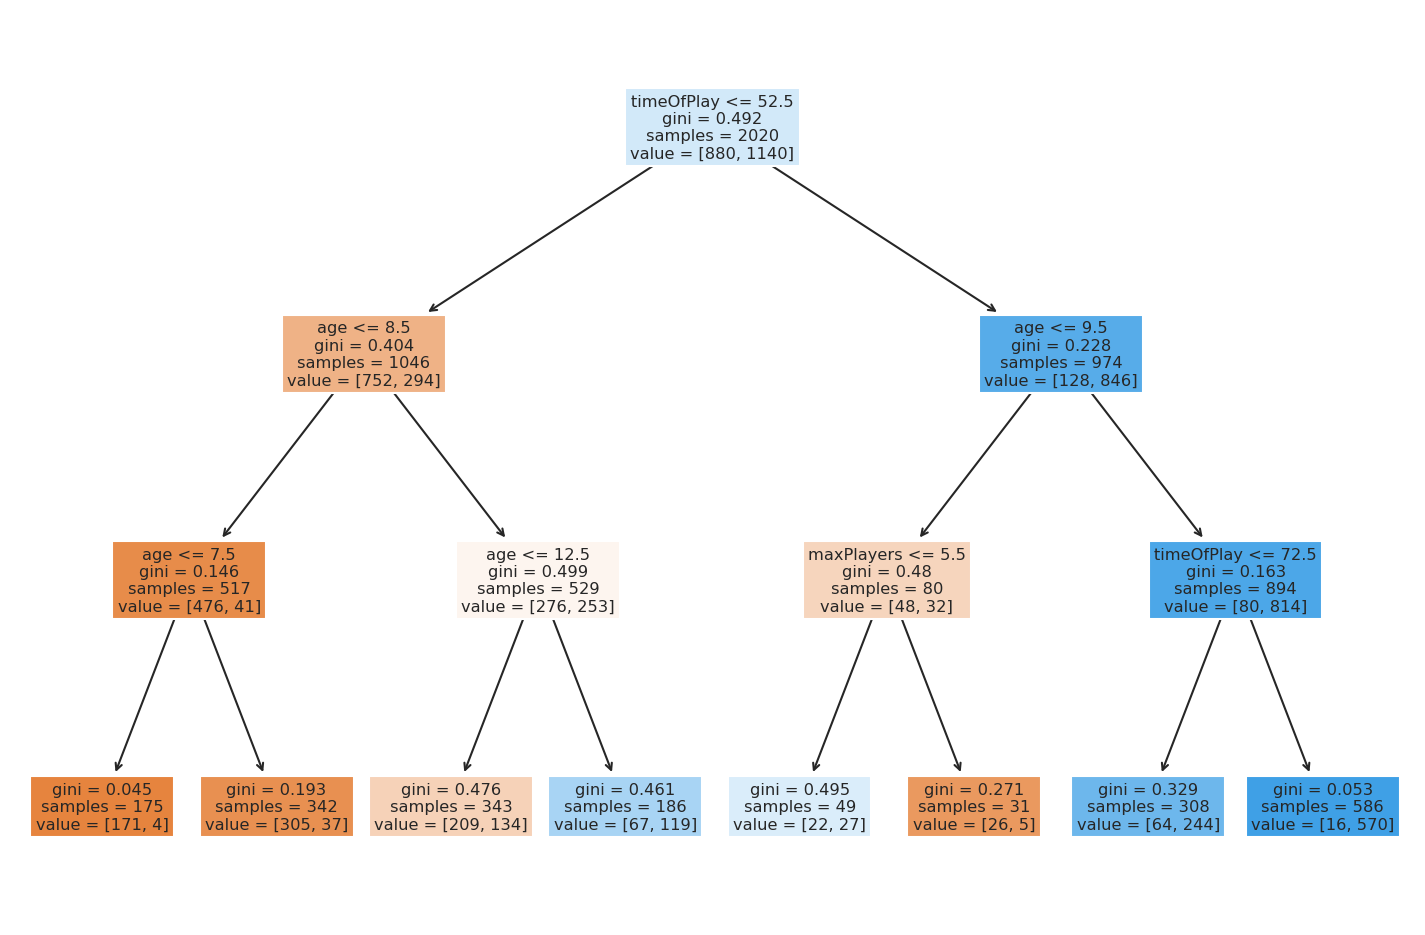

In [83]:
report_model(pruned_tree, visual = True)

Ok, with a very simple tree we get an accuracy of over 79% and can see that the first split was done in the `timeOfPlay` feature.

### Creating a pruned tree - setting max_leaf_nodes

The next parameter to control the size of our tree is the `max_leaf_nodes`. Let's restrict this one too and see our decision process:

In [84]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

Accuracy:  0.7623762376237624
              precision    recall  f1-score   support

      Casual       0.67      0.86      0.75       214
      Expert       0.87      0.69      0.77       291

    accuracy                           0.76       505
   macro avg       0.77      0.78      0.76       505
weighted avg       0.79      0.76      0.76       505





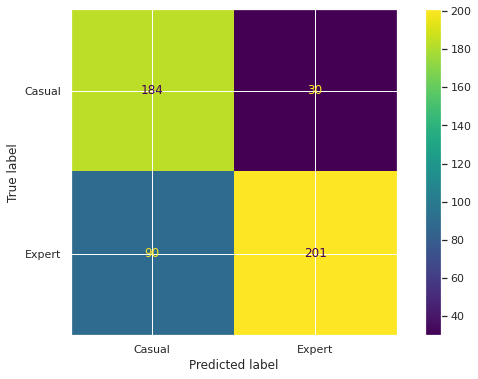

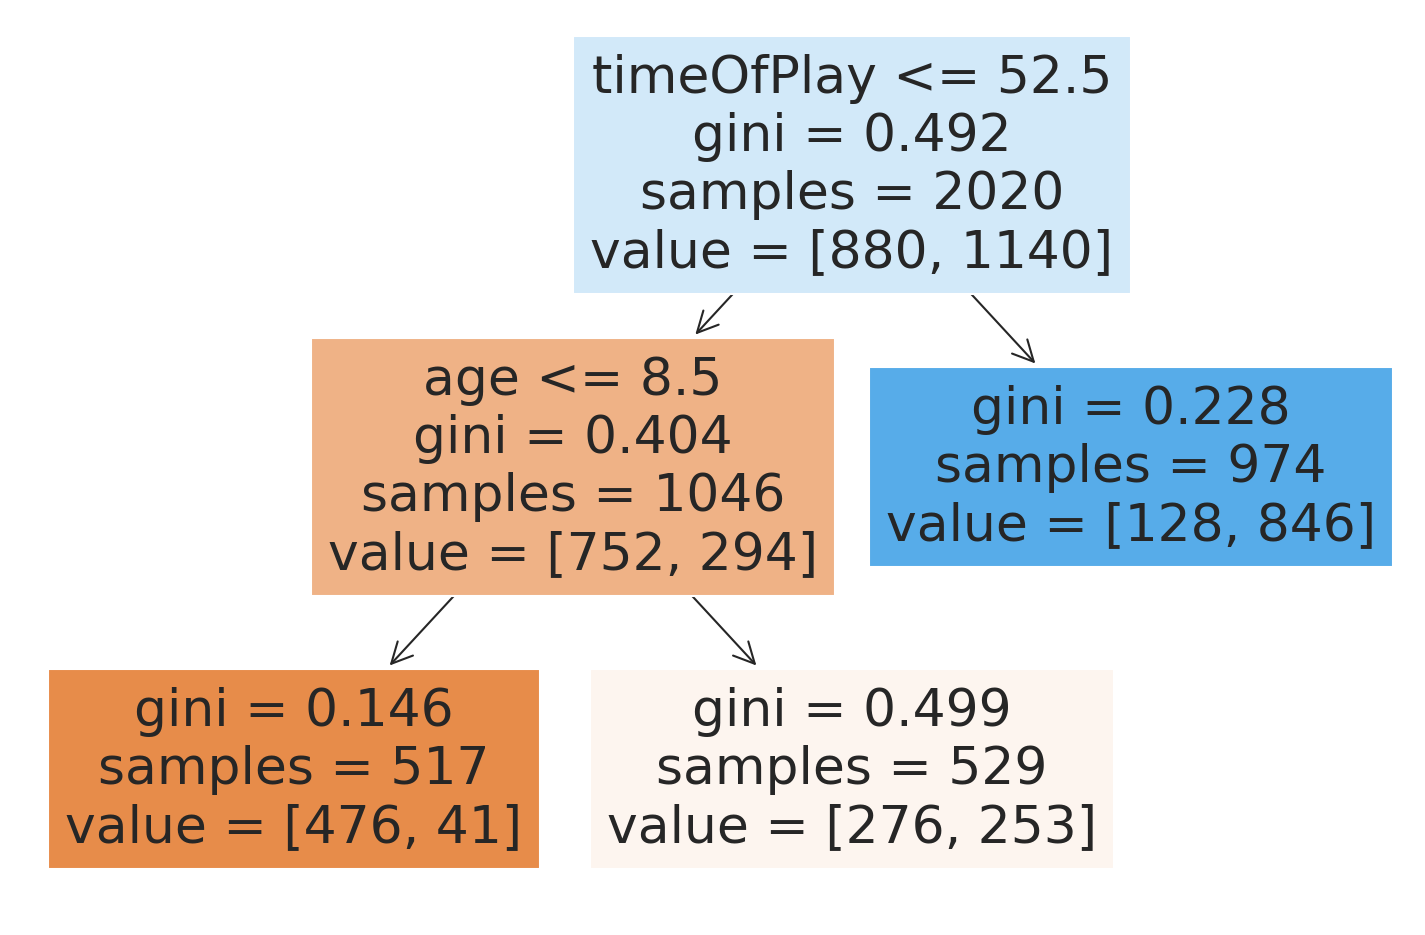

In [85]:
report_model(pruned_tree, visual = True)

We can plot out the accuracy for various choices of these two parameters and get values for a better estimator (we could do this using GridSearch, but the goal here is to SEE the decision process of the splits and check the importance of each feature).

In [86]:
# Let's see how accuracy varies with max_leaf_nodes
acc = []
for leafs in range(2,20):
    tree = DecisionTreeClassifier(max_leaf_nodes=leafs)
    tree.fit(X_train,y_train)
    
    tree_preds = tree.predict(X_test)
    acc.append(accuracy_score(y_test,tree_preds))

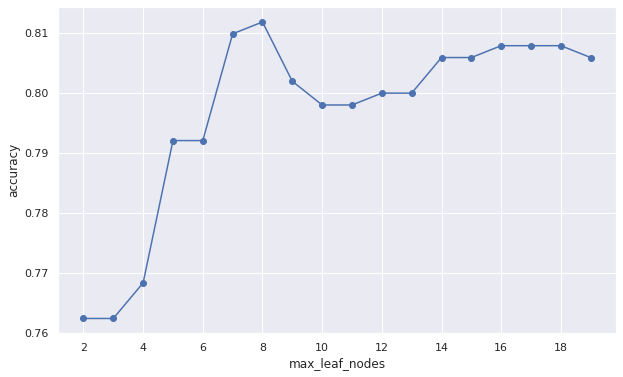

In [87]:
plt.plot(range(2,20), acc, '-bo')
plt.xticks(np.arange(2,20,2))
plt.xlabel('max_leaf_nodes')
plt.ylabel('accuracy')
plt.show();

A simple decision tree with 8 `max_leaf_nodes` can be used to get an accuracy of over 0.81!

Let's do the same for `max_depth`:

In [88]:
# Let's see how accuracy varies with max_depth
acc = []
for depth in range(2,20):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train,y_train)
    
    tree_preds = tree.predict(X_test)
    acc.append(accuracy_score(y_test,tree_preds))

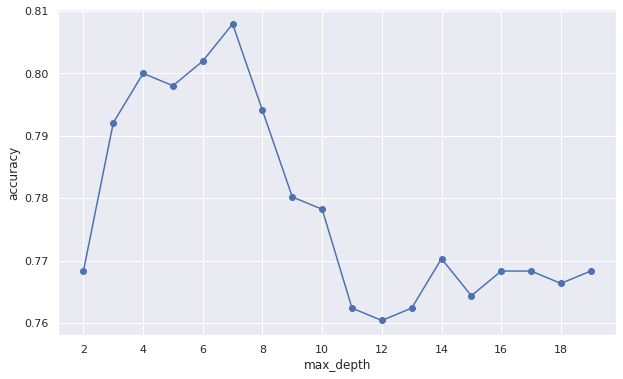

In [89]:
plt.plot(range(2,20), acc, '-bo')
plt.xticks(np.arange(2,20,2))
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show();

Using both "best" values to create a better tree:

In [90]:
super_tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes = 8)
super_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=8)

Accuracy:  0.8118811881188119
              precision    recall  f1-score   support

      Casual       0.81      0.72      0.76       214
      Expert       0.81      0.88      0.84       291

    accuracy                           0.81       505
   macro avg       0.81      0.80      0.80       505
weighted avg       0.81      0.81      0.81       505





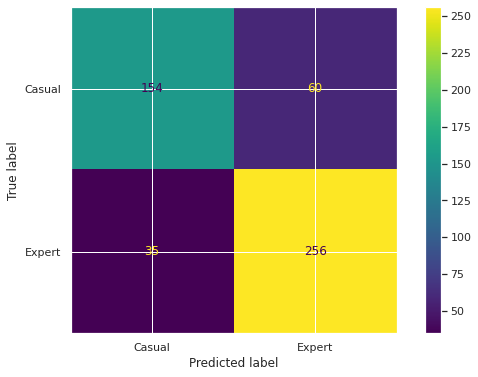

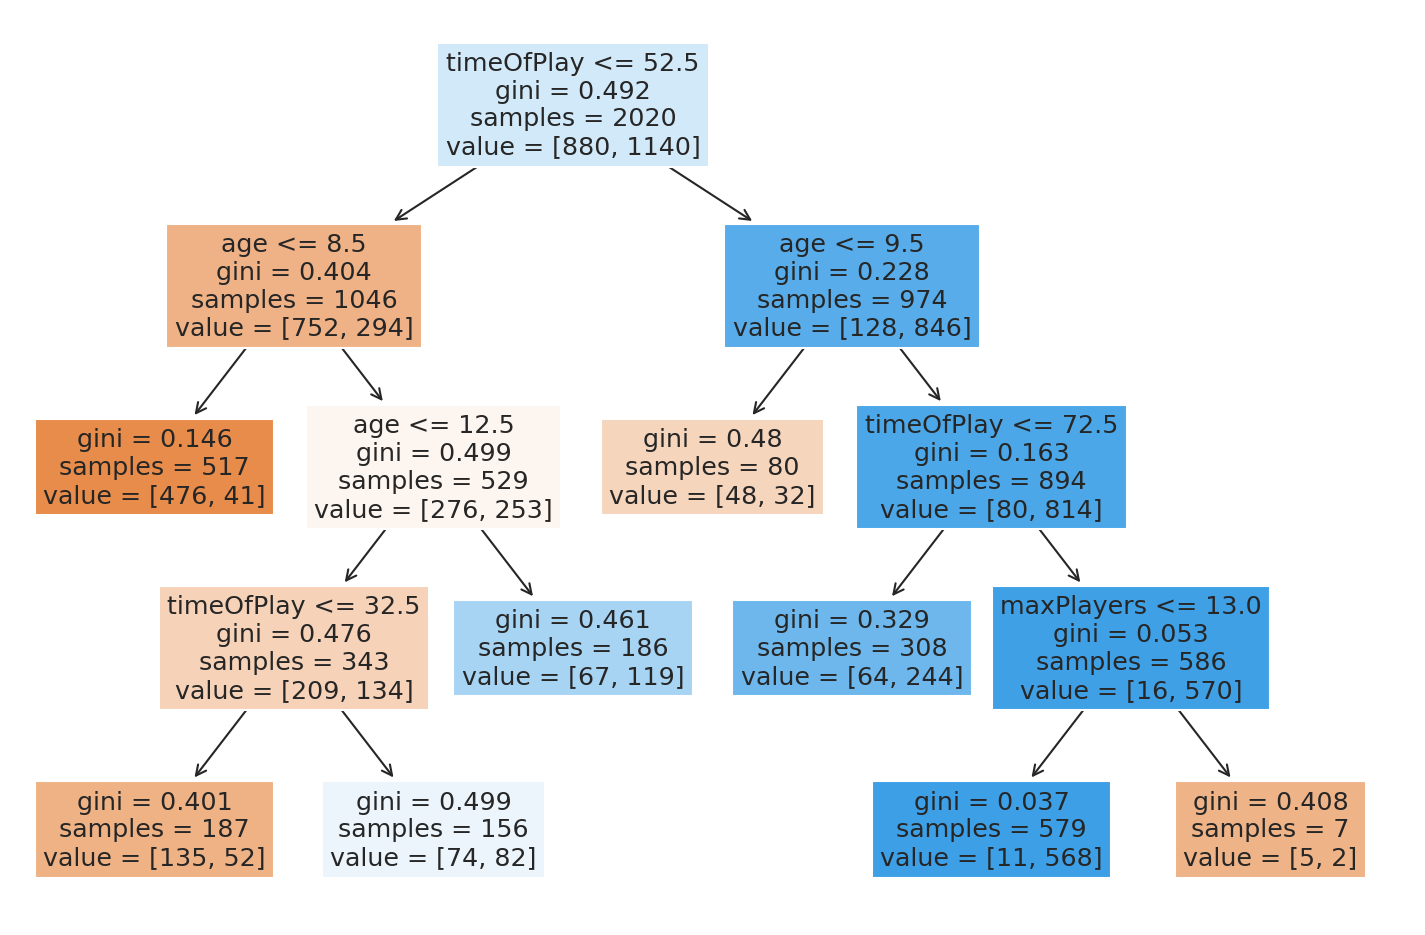

In [91]:
report_model(super_tree, visual = True)

We can check feature importances for our model directly in a pandas df object:

In [92]:
pd.DataFrame(index=X.columns,data=super_tree.feature_importances_,columns=['Feature Importance'])

Feature Importance
age                   0.265044
timeOfPlay            0.721970
minPlayers            0.000000
maxPlayers            0.012987

Here we see that `timeOfPlay` is really crucial in separating expert games from casual. Also, the `minPlayers` feature was not used in creating the decision tree.

## 14.5- Cross-validation on our final tree

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
scores = cross_val_score(super_tree,X_train,y_train,
                         scoring='accuracy',cv=5)

In [95]:
print('Cross-validated accuracy scores:')
print(scores)
print(50*'=')
print('Mean accuracy score:')
print(scores.mean())

Cross-validated accuracy scores:
[0.80940594 0.80693069 0.82178218 0.79950495 0.83910891]
Mean accuracy score:
0.8153465346534654


## 14.6- Building a RandomForest

We played a bit with simple trees, now it's time compare our tuning with a random forest and see how we did.

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
base_rf = RandomForestClassifier()

In [98]:
base_rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy:  0.7900990099009901
              precision    recall  f1-score   support

      Casual       0.75      0.77      0.76       214
      Expert       0.82      0.81      0.82       291

    accuracy                           0.79       505
   macro avg       0.79      0.79      0.79       505
weighted avg       0.79      0.79      0.79       505



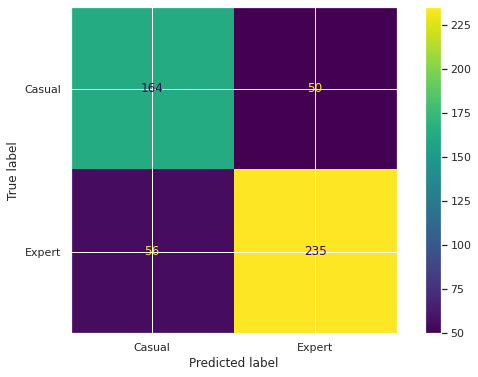

In [99]:
report_model(base_rf)

The default classifier reports an accuracy of around 79%. Let's do some tuning using GridSearch and get the best possible random forest classifier.

### Tuning with GridSearch

NOTE: code is commented because it took a relative long time to do the search. Bellow the model`rfc_best_params` is built with the results from the gridsearch.

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# n_estimators=[5,10,20,100]
# max_depth=list(range(2,10))
# max_leaf_nodes=list(range(2,10))
# max_features= [2,3,4]
# bootstrap = [True,False]

# param_grid = {'n_estimators':n_estimators,
#               'max_depth':max_depth,
#               'max_leaf_nodes':max_leaf_nodes,
#               'max_features':max_features,
#               'bootstrap':bootstrap}

In [102]:
# rfc = RandomForestClassifier()
# grid = GridSearchCV(rfc,param_grid)

In [103]:
# grid.fit(X_train,y_train)

In [104]:
# grid.best_params_

In [105]:
# Using best parameters from grid search
rfc_best_params = RandomForestClassifier(bootstrap=True,
                                         max_depth = 9,
                                         max_features = 2,
                                         max_leaf_nodes = 9,
                                         n_estimators = 20)

In [106]:
rfc_best_params.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=2, max_leaf_nodes=9,
                       n_estimators=20)

Accuracy:  0.807920792079208
              precision    recall  f1-score   support

      Casual       0.78      0.77      0.77       214
      Expert       0.83      0.84      0.83       291

    accuracy                           0.81       505
   macro avg       0.80      0.80      0.80       505
weighted avg       0.81      0.81      0.81       505



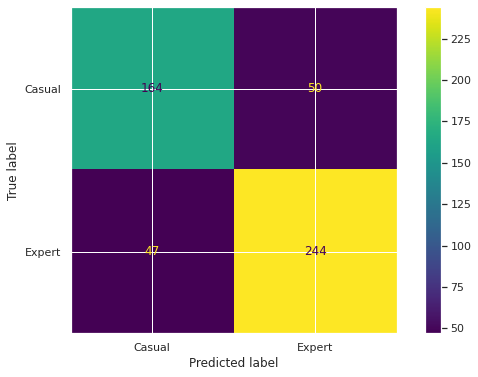

In [107]:
report_model(rfc_best_params)

#### Cross-validated accuracy scores

In [108]:
scores = cross_val_score(rfc_best_params, X_train, y_train,
                         scoring='accuracy', cv=5)

In [109]:
print('Cross-validated accuracy scores:')
print(scores)
print(50*'=')
print('Mean accuracy score:')
print(scores.mean())

Cross-validated accuracy scores:
[0.85148515 0.80693069 0.84158416 0.79950495 0.84405941]
Mean accuracy score:
0.8287128712871287


OK, so there is an improvement from our simple decision tree.

We can visualize feature importances for our improved model.

In [110]:
imp_features = pd.DataFrame(index=X.columns,data=rfc_best_params.feature_importances_,columns=['Importance'])

In [111]:
imp_features.sort_values("Importance")

Importance
minPlayers    0.002855
maxPlayers    0.043702
age           0.432228
timeOfPlay    0.521215

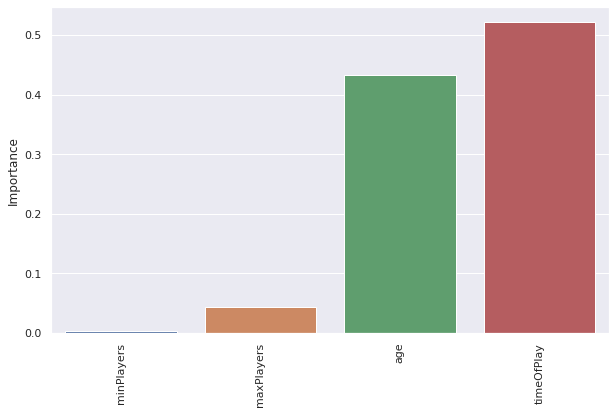

In [112]:
# plt.figure(figsize=(5,3),dpi=200)
sns.barplot(data=imp_features.sort_values('Importance'),x=imp_features.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

Ok, so `age` and `timeOfPlay` are the two more "important" features. Let's see the count of different values for these features in each `dominio` class.

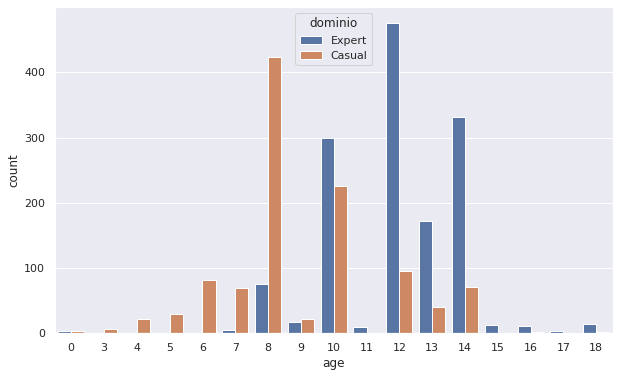

In [113]:
sns.countplot(data=df_model,x='age',hue='dominio');

We can clearly see that for higher ages the number of `Expert` games is far greater. That is, games for older audiences tend to be `expert` games.

The same logic applies to the `timeOfPlay`. `Expert` games tend to take longer to play.

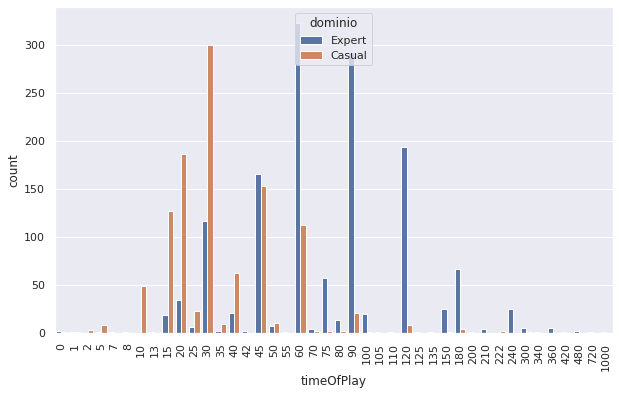

In [114]:
sns.countplot(data=df_model,x='timeOfPlay',hue='dominio')
plt.xticks(rotation=90);

In [115]:
# # CHECKING FOR ERRORS AS FUNCTION OF N_ESTIMATORS
# errors = []
# misclassifications = []

# for n in range(1,150,2):
#     rfc = RandomForestClassifier(bootstrap=True,
#                                  max_depth = 9,
#                                  max_features = 2,
#                                  max_leaf_nodes = 9,
#                                  n_estimators = n)
#     rfc.fit(X_train,y_train)
#     preds = rfc.predict(X_test)
#     err = 1 - accuracy_score(preds,y_test)
#     n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
#     errors.append(err)
#     misclassifications.append(n_missed)

In [116]:
# plt.plot(range(1,150,2),errors)

In [117]:
# plt.plot(range(1,150,2),misclassifications)

# 15- Making predictions

In [118]:
X_train.columns

Index(['age', 'timeOfPlay', 'minPlayers', 'maxPlayers'], dtype='object')

In [119]:
# Predict a game with:
# age: 12
# timeofPlay: 90 min
# minPlayers: 2
# maxPlayers: 4
X_pred = [12,90,2,4]
rfc_best_params.predict([X_pred])

array(['Expert'], dtype=object)

In [120]:
rfc_best_params.predict_proba([X_pred])

array([[0.03748136, 0.96251864]])

# 16- Save the model

In [121]:
import joblib

In [122]:
filename = 'predict_domain.sav'

In [123]:
joblib.dump(rfc_best_params, filename)

['predict_domain.sav']

To load the model for use later:
```
loaded_model = joblib.load('predict_domain.sav')
# Get prediction
loaded_model.predict(X_pred)
```

So, our model can predict with a reasonable error the domain (`dominio`) of a game based on this 4 features (we could try to exclude `minPlayers`).